In [2]:
#setup data
import csv
import pandas as pd
import numpy as np

#define risk free rate(rfr) as the three month treasure yield (DGS3MO)
rfr = np.array((5244,1))
#define term spread as 10 year treasure interest(DGS10) minus 1 year treasure interest(DGS1)
ts = np.array((5244,1))
#define default spread as the yield gap between AAA(DAAA) and BBB(DBAA) grade bonds
ds = np.array((5244,1))
ones = np.ones((5244,1))[:,0]

data1 = pd.read_csv('spread.csv')
data2 = pd.read_csv('StockMarket.csv')
data = pd.merge(data1, data2, on='Date')
rfr = data['DGS3MO']
ds = data['DGS10'] - data['DGS1']
ts = data['DAAA'] - data['DBAA']
# print(rfr.shape)
# print(ds.shape)
# print(ts.shape)
# print(ones.shape)
A = np.stack((rfr, ds, ts, ones), axis = 1)
#delete the last data since there is no label for the next day
A = np.delete(A, 5243, 0)
# print(data)

#the yield of three major index: Dow Jones, SP 500 and Nasdaq
B_raw = np.stack((data['DJIA'], data['SP500'], data['NASDAQ']), axis = 1)
#Labeled as -1 if the market loss the next day, +1 otherwise 
B = np.zeros((5244, 3))
for i in range(5244):
    for j in range(3):
        B[i][j] = -1 if B_raw[i][j] < 0 else 1

#delete first label since there is no previous day data to predict
B= np.delete(B, 0, 0)

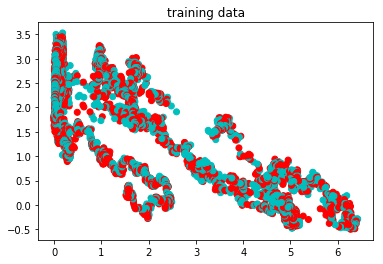

In [3]:
import matplotlib.pyplot as plt

plt.scatter(A[:,0],A[:,1], color=['c' if i==-1 else 'r' for i in B[:,0]])
plt.title('training data')
plt.show()

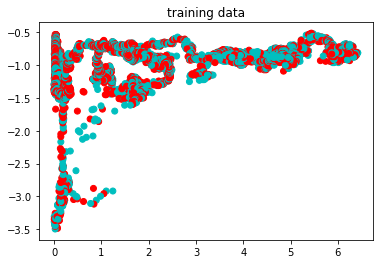

In [4]:
plt.scatter(A[:,0],A[:,2], color=['c' if i==-1 else 'r' for i in B[:,0]])
plt.title('training data')
plt.show()

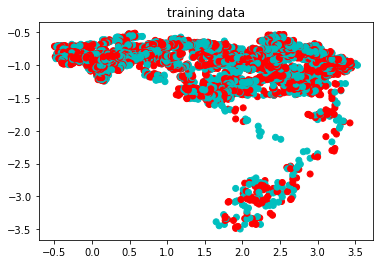

In [5]:
plt.scatter(A[:,1],A[:,2], color=['c' if i==-1 else 'r' for i in B[:,0]])
plt.title('training data')
plt.show()